# 加速神經網路的訓練 -- 選擇優化器與批次正規化
神經網路訓練時間太長的問題，可以選擇或自訂優化器來加入訓練。或是另一種作法：批次正規化。


## 優化器 Optimizer
優化器功能是更新神經網路的權重，來讓損失函數的誤差值最小化，以便最終可以找到神經網路的最佳權重。作法上，優化器是利用梯度下降法來更新神經網路的權重。

`W1 = W0 - 學習率*梯度`

我們可以調整學習率。代表每次更新時，學習的步伐大小。

另一種方式是增加另一種參數：動量。

`V1 = - (學習率*梯度 + V0*動量)`

`W1 = W0 + V1`

動量Momentum參數代表額外增加更新權重的力度，可以加速神經網路的訓練，使其更快收斂。動量一詞源於物理學的慣性，同一方向會加速，更改方向會減速。當梯度方向和上一次更新量的方向相同時，學習率會得到加速作用；當梯度方向和上一次更新量的方向相反時，學習率可以得到減速作用。

可以想像有一顆球在斜坡上，推一下球會因為慣性往坡下滾，如果沒有受到阻力，就會越滾越快，受到阻力就會減慢滾動速度。甚至有可能往反方向滾動回頭。
圖示簡介可以參閱以下網址：
[Optimizer](https://ithelp.ithome.com.tw/articles/10236554)

此外，還有另一個參數是學習率衰減率係數decay。是指學習率會隨著每一次參數更新而逐漸減少。剛開始訓練用大步伐，當訓練越來越接近最小值時，學習率的步伐就會變小。

`lr1 = lr0 * 1.0/(1.0 + decay*更新次數)`

常見的優化器有下列數種：
1. SGD
2. Adagrad （使用自適應性學習率）
3. RMSprop （增加衰減係數）
4. Adam  （Adagrad+Momentum)


### 使用SGD優化器

Epoch 1/40
313/313 [==============================] - 8s 10ms/step - loss: 2.0862 - accuracy: 0.2376 - val_loss: 1.8892 - val_accuracy: 0.3447
Epoch 2/40
313/313 [==============================] - 2s 8ms/step - loss: 1.8132 - accuracy: 0.3530 - val_loss: 1.7786 - val_accuracy: 0.3886
Epoch 3/40
313/313 [==============================] - 2s 7ms/step - loss: 1.6559 - accuracy: 0.4058 - val_loss: 1.7182 - val_accuracy: 0.3986
Epoch 4/40
313/313 [==============================] - 2s 8ms/step - loss: 1.5522 - accuracy: 0.4418 - val_loss: 1.4503 - val_accuracy: 0.4958
Epoch 5/40
313/313 [==============================] - 2s 8ms/step - loss: 1.4762 - accuracy: 0.4690 - val_loss: 1.3883 - val_accuracy: 0.5133
Epoch 6/40
313/313 [==============================] - 3s 8ms/step - loss: 1.4125 - accuracy: 0.4924 - val_loss: 1.3466 - val_accuracy: 0.5194
Epoch 7/40
313/313 [==============================] - 2s 7ms/step - loss: 1.3566 - accuracy: 0.5119 - val_loss: 1.2528 - val_accuracy: 0.5648
Epoch

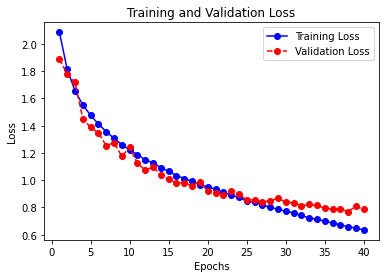

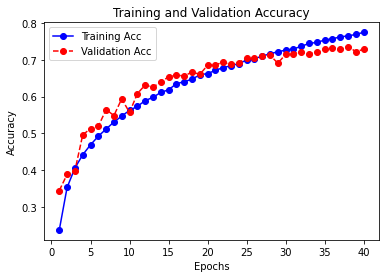

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers      #載入優化器函式庫

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
#model.summary()   # 顯示模型摘要資訊

# 編譯模型前，宣告使用SGD優化器。在編譯時使用optimizer參數來指定優化器物件
opt_sgd = optimizers.SGD(learning_rate=0.05)  
model.compile(loss="categorical_crossentropy", optimizer=opt_sgd, metrics=["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=40, batch_size=128, verbose=1)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



### 使用RMSprop優化器

Epoch 1/13
313/313 [==============================] - 4s 9ms/step - loss: 1.7482 - accuracy: 0.3708 - val_loss: 1.5766 - val_accuracy: 0.4174
Epoch 2/13
313/313 [==============================] - 3s 8ms/step - loss: 1.3437 - accuracy: 0.5227 - val_loss: 1.2229 - val_accuracy: 0.5782
Epoch 3/13
313/313 [==============================] - 3s 8ms/step - loss: 1.1774 - accuracy: 0.5817 - val_loss: 1.0704 - val_accuracy: 0.6268
Epoch 4/13
313/313 [==============================] - 3s 8ms/step - loss: 1.0741 - accuracy: 0.6236 - val_loss: 1.0103 - val_accuracy: 0.6424
Epoch 5/13
313/313 [==============================] - 3s 8ms/step - loss: 1.0015 - accuracy: 0.6500 - val_loss: 1.0854 - val_accuracy: 0.6407
Epoch 6/13
313/313 [==============================] - 3s 8ms/step - loss: 0.9409 - accuracy: 0.6715 - val_loss: 0.9059 - val_accuracy: 0.6894
Epoch 7/13
313/313 [==============================] - 3s 8ms/step - loss: 0.8925 - accuracy: 0.6891 - val_loss: 0.9128 - val_accuracy: 0.6839
Epoch 

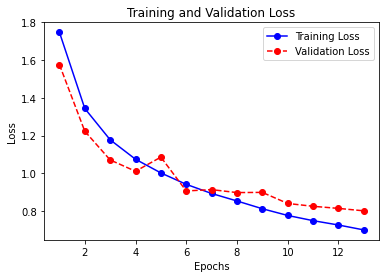

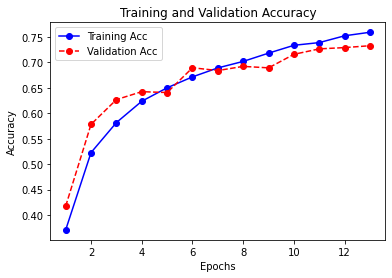

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
#model.summary()   # 顯示模型摘要資訊

# 編譯模型前，宣告使用RMSprop優化器，設定學習率與衰減係數。在編譯時使用optimizer參數來指定優化器物件opt_rms
opt_rms = optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt_rms, metrics=["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=13, batch_size=128, verbose=1)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 使用Adam優化器

Epoch 1/13
313/313 [==============================] - 3s 9ms/step - loss: 1.6860 - accuracy: 0.3855 - val_loss: 1.3526 - val_accuracy: 0.5318
Epoch 2/13
313/313 [==============================] - 2s 8ms/step - loss: 1.3143 - accuracy: 0.5296 - val_loss: 1.1662 - val_accuracy: 0.6020
Epoch 3/13
313/313 [==============================] - 2s 8ms/step - loss: 1.1708 - accuracy: 0.5833 - val_loss: 1.0587 - val_accuracy: 0.6326
Epoch 4/13
313/313 [==============================] - 2s 8ms/step - loss: 1.0715 - accuracy: 0.6198 - val_loss: 0.9991 - val_accuracy: 0.6479
Epoch 5/13
313/313 [==============================] - 2s 8ms/step - loss: 0.9964 - accuracy: 0.6479 - val_loss: 0.9331 - val_accuracy: 0.6758
Epoch 6/13
313/313 [==============================] - 2s 8ms/step - loss: 0.9397 - accuracy: 0.6667 - val_loss: 0.9125 - val_accuracy: 0.6820
Epoch 7/13
313/313 [==============================] - 2s 8ms/step - loss: 0.8954 - accuracy: 0.6876 - val_loss: 0.8610 - val_accuracy: 0.7011
Epoch 

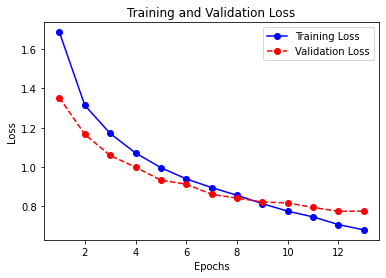

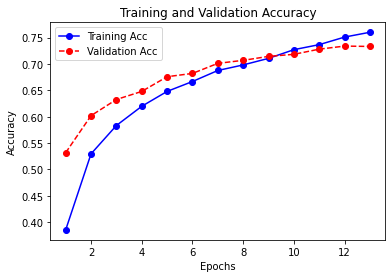

In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
#model.summary()   # 顯示模型摘要資訊

# 編譯模型前，宣告使用RMSprop優化器，設定學習率與衰減係數。在編譯時使用optimizer參數來指定優化器物件opt_adam
opt_adam = optimizers.Adam(learning_rate=0.001,decay=1e-6)
model.compile(loss="categorical_crossentropy", optimizer=opt_adam, metrics=["accuracy"])

# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=13, batch_size=128, verbose=1)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

其他優化器的介紹與比較，可參考此網頁：[機器學習ML NOTE](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db)

## 批次正規化（Batch Normalization）
批次正規化（簡稱BN），和之前說過的特徵標準化很相似。將樣本資料進行特徵標準化後送入神經網路。但在後續調整權重，更新參數值的時候，有可能在神經網路中再次讓數值變得很大或變得很小。這個問題在原始論文中被提及，稱為「內部共變量位移」。 當網路內部的資料再次變得很大或很小時，經過啟動函數後，會讓輸出值永遠為最大值或最小值。例如Tanh函數在資料太大或太小時，輸出值就只會出現1或-1。這表示網路對這些資料已經沒有任何敏感度。

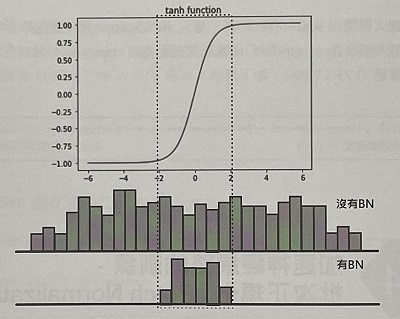

沒有經過批次正規化，資料分佈在經過Tanh函數後，會變得大部分都是1或-1，表示資料的多樣性會消失。如果使用BN，資料範圍會再次分布至啟動函數的敏感區域之間，也就會讓輸出分佈在每一個區間內都有數值。分布更平均，如此才能將有價值的資料傳遞到下一層神經層。

使用BN的優點有：
1. 加速神經網路的訓練，可以更快收斂
2. 在優化器裡可以使用更大的學習率，初始權重的設定可以更加簡單，不容易收到隨機的影響
3. 緩解梯度消失問題，在神經層可以使用更多種的啟動函數

### 在MLP中使用BN層
BN層在MLP裡會放在Dense層之後，啟動函數層之前（會需要使用獨立的啟動函數層）。

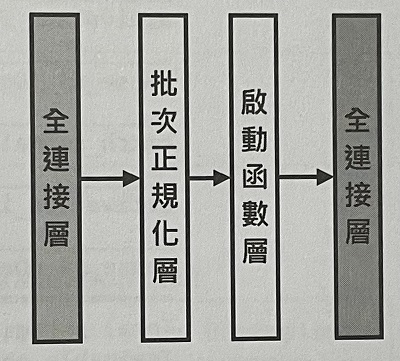

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                99        
                                                                 
 batch_normalization_2 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 11)                0         
                                                                 
 dense_13 (Dense)            (None, 11)                121       
                                                                 
 batch_normalization_3 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 11)               

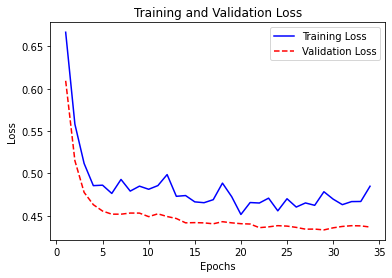

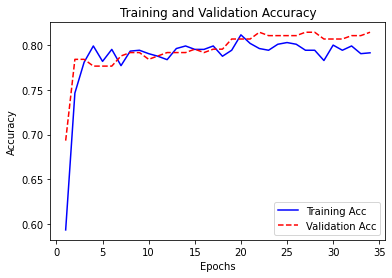

In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

seed = 7
np.random.seed(seed)
# 載入Titanic的訓練和測試資料集
df_train = pd.read_csv("./titanic_train.csv")
df_test = pd.read_csv("./titanic_test.csv")
dataset_train = df_train.values
dataset_test = df_test.values
# 分割成特徵資料和標籤資料
X_train = dataset_train[:, 0:9]
Y_train = dataset_train[:, 9]
X_test = dataset_test[:, 0:9]
Y_test = dataset_test[:, 9]
# 特徵標準化
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)
# 定義模型
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], use_bias=False))
model.add(BatchNormalization())    # 加入批次正規化層
model.add(Activation("relu"))
model.add(Dense(11, use_bias=False))
model.add(BatchNormalization())    # 加入批次正規化層
model.add(Activation("relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 訓練模型
print("Training ...")
history = model.fit(X_train, Y_train, verbose=2,
          validation_data=(X_test, Y_test), 
          epochs=34, batch_size=10)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "b-", label="Training Loss")
plt.plot(epochs, val_loss, "r--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### 在CNN中使用BN層
BN層在CNN裡會放在Conv2D層之後，啟動函數層之前。

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        864       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18432     
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 64)      

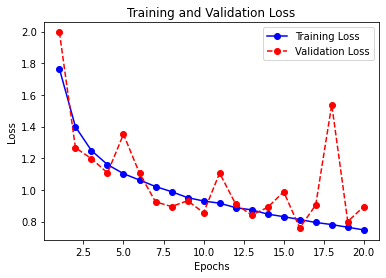

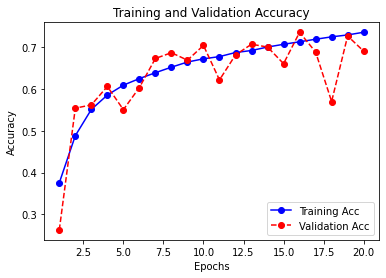

In [7]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=X_train.shape[1:], use_bias=False))
model.add(BatchNormalization())       # 加入批次正規化層
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", use_bias=False))
model.add(BatchNormalization())       # 加入批次正規化層
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=20, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()